In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data2.csv")
print(df.shape)
df

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df = df.rename(columns={'caa': 'ca'})

Удалим параметры, которые будет достаточно тяжело собирать. Тем самым мы теряем несколько процентов accuracy в угоду удобства для пользователей 

In [4]:
del df["oldpeak"]
del df["thall"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   slp       303 non-null    int64
 10  ca        303 non-null    int64
 11  output    303 non-null    int64
dtypes: int64(12)
memory usage: 28.5 KB


age: Возраст пациента

sex: Пол пациента

cp: Тип боли в груди $\\$
Значение 0: бессимптомное $\\$
Значение 1: атипичная стенокардия $\\$
Значение 2: неангинальная боль $\\$
Значение 3: типичная стенокардия $\\$

trtbps: кровяное давление в состоянии покоя (в мм рт. ст.) 

chol: холесторал в мг/дл, полученный с помощью датчика ИМТ 

fbs: (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = ложно) 

restecg: результаты электрокардиографии в покое $\\$
Значение 0: нормальное $\\$
Значение 1: наличие аномалий ST-T (инверсия зубца Т и/или элевация или депрессия ST > 0,05 мВ) $\\$
Значение 2: наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса $\\$

thalachh: максимальная частота сердечных сокращений

exng: стенокардия, вызванная физической нагрузкой  

slope: наклон пикового сегмента ST при нагрузке — 0: нисходящий; 1: плоский; 2: восходящий

ca: количество крупных сосудов (артерий), которые пострадали или затронуты в результате болезни.

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,slp,ca,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000


$\textbf{Посмотрим немного на графики распределения данных:}$

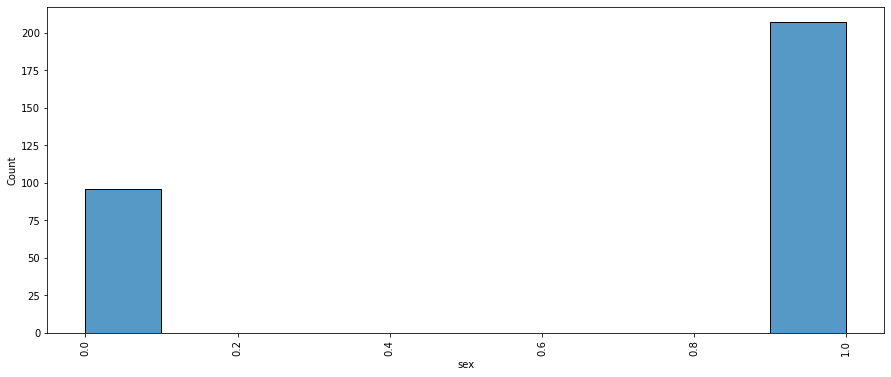

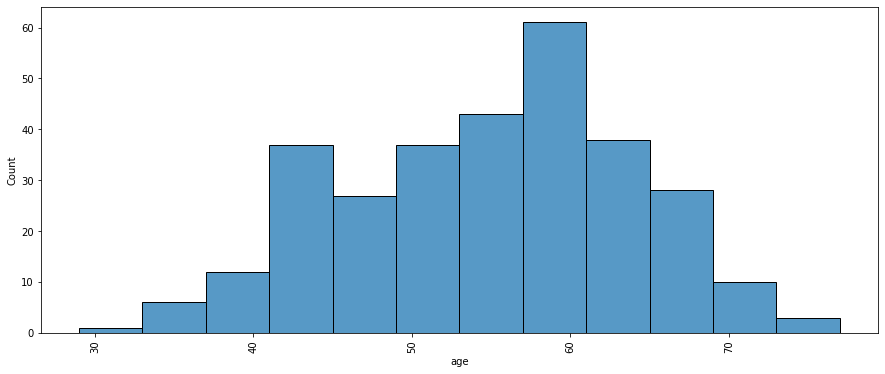

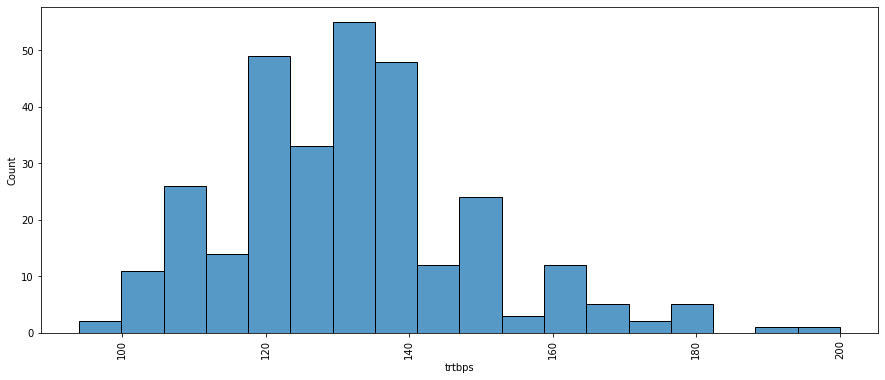

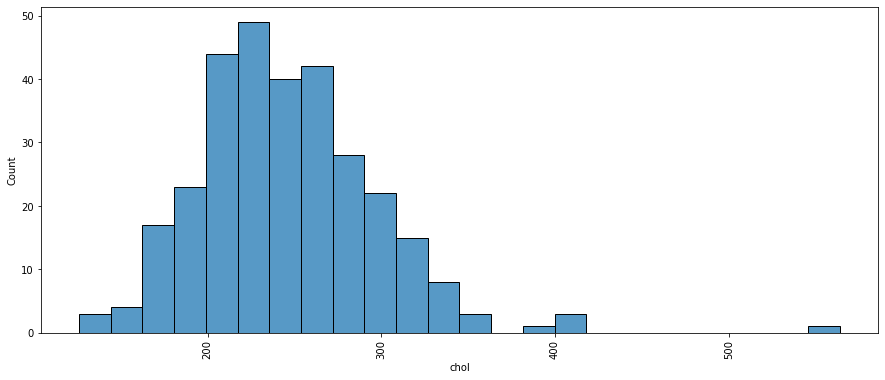

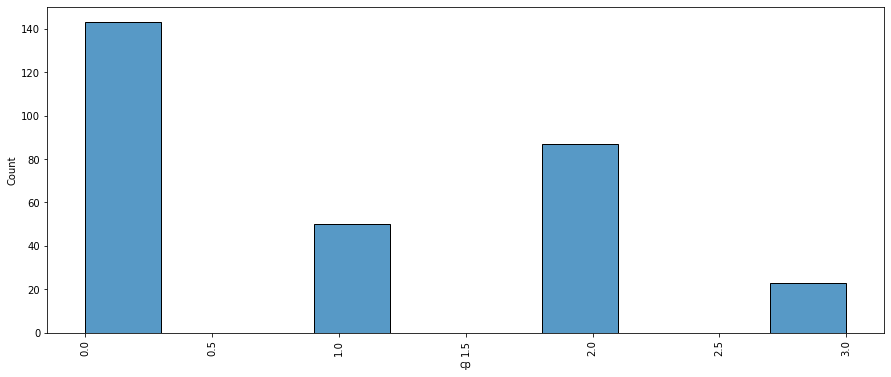

In [7]:
distribution_chart_columns = ['sex', 'age',
       'trtbps', 'chol', 'cp']
for i in distribution_chart_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [8]:
df["restecg_norm"] = (df["restecg"] == 0).astype(int)
df["restecg_type1"] = (df["restecg"] == 1).astype(int)
df["restecg_type2"] = (df["restecg"] == 2).astype(int)
del df["restecg"]

In [9]:
df["asymptomatic"] = (df["cp"] == 0).astype(int)
df["atypical_angina"] = (df["cp"] == 1).astype(int)
df["non-anginal"] = (df["cp"] == 2).astype(int)
df["typical_angina"] = (df["cp"] == 3).astype(int)
del df["cp"]

In [10]:
df["ca_0"] = (df["ca"] == 0).astype(int)
df["ca_1"] = (df["ca"] == 1).astype(int)
df["ca_2"] = (df["ca"] == 2).astype(int)
df["ca_3"] = (df["ca"] == 3).astype(int)
df["ca_4"] = (df["ca"] == 4).astype(int)
del df["ca"]

In [11]:
df.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,slp,output,restecg_norm,...,restecg_type2,asymptomatic,atypical_angina,non-anginal,typical_angina,ca_0,ca_1,ca_2,ca_3,ca_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.399340,0.544554,0.485149,...,0.013201,0.471947,0.165017,0.287129,0.075908,0.577558,0.214521,0.125413,0.066007,0.016502
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,0.616226,0.498835,0.500606,...,0.114325,0.500038,0.371809,0.453171,0.265288,0.494765,0.411169,0.331734,0.248704,0.127605
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

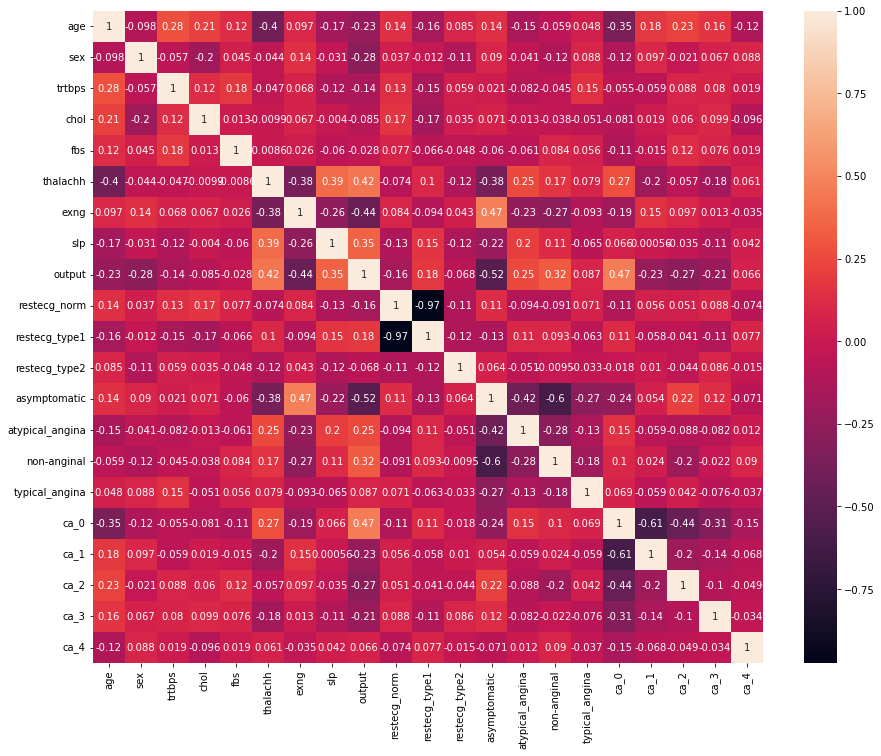

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

Теперь посмотрим на долю больных и здоровых людей по разным категориям:

In [13]:
df_age = df[["age", "output"]]
df_age = df_age.groupby('age').mean()

In [14]:
df_age.reset_index(inplace= True )

Посмотрим на вероятность/долю инфаркта по разным возрастам:

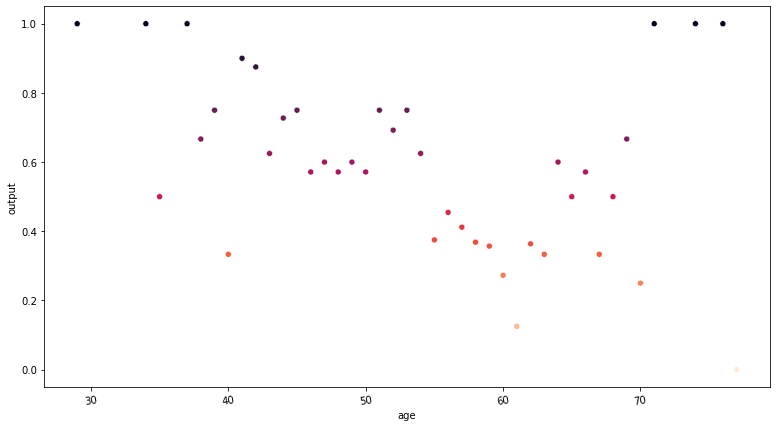

In [15]:
f, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(
    x="age",
    y="output",
    hue="output", palette=sns.color_palette("rocket_r", as_cmap=True),
    sizes=(1, 8),
    linewidth=0.5,
    data=df_age,
    ax=ax, legend=False
)
plt.xticks(rotation=9)
plt.show()

$\textbf{Нормализация:}$

In [16]:
df["age"] = df["age"] / 100
df["trtbps"] = df["trtbps"] / 280
df["chol"] = df["chol"] / 600 
df["thalachh"] = df["thalachh"] / 250 

In [17]:
df

,age,sex,trtbps,chol,fbs,thalachh,exng,slp,output,restecg_norm,...,restecg_type2,asymptomatic,atypical_angina,non-anginal,typical_angina,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.63,1,0.517857,0.388333,1,0.600,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
1,0.37,1,0.464286,0.416667,0,0.748,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.41,0,0.464286,0.340000,0,0.688,0,2,1,1,...,0,0,1,0,0,1,0,0,0,0
3,0.56,1,0.428571,0.393333,0,0.712,0,2,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0.57,0,0.428571,0.590000,0,0.652,1,2,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.57,0,0.500000,0.401667,0,0.492,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
299,0.45,1,0.392857,0.440000,0,0.528,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
300,0.68,1,0.514286,0.321667,1,0.564,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
301,0.57,1,0.464286,0.218333,0,0.460,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


$\textbf{Распределение на test data и train data}$

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(["output"], axis=1)
y = df["output"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=3
)

In [29]:
sum(y_train)

136

$\textbf{Обучение}$

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


logistic_model = LogisticRegression()
linear_model = LinearRegression()
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

logistic_model.fit(x_train, y_train)
linear_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
nb_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

logistic_pred = logistic_model.predict(x_test)
linear_pred = linear_model.predict(x_test)
gb_pred = gb_model.predict(x_test)
nb_pred = nb_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
svm_pred = svm_model.predict(x_test)

logistic_acc = accuracy_score(y_test, logistic_pred)
linear_acc = accuracy_score(y_test, linear_pred.round())
gb_acc = accuracy_score(y_test, gb_pred)
nb_acc = accuracy_score(y_test, nb_pred)
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)


print("Logistic Regression:", logistic_acc)
print("Linear Regression:  ", linear_acc)
print("Gradient Boosting:  ", gb_acc)
print("Naive Bayes:        ", nb_acc)
print("KNN:                ", knn_acc)
print("SVM:                ", svm_acc)

Logistic Regression: 0.8043478260869565
Linear Regression:   0.8260869565217391
Gradient Boosting:   0.8260869565217391
Naive Bayes:         0.5869565217391305
KNN:                 0.9347826086956522
SVM:                 0.9130434782608695


In [22]:
import pickle
with open("linear_model", "wb") as file:
    pickle.dump(linear_model, file)
with open("svm_model", "wb") as file:
    pickle.dump(svm_model, file)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from random import randrange
max_acc = 0
for i in range(1000):
    n_estimators = randrange(50, 500, 50)
    max_depth = randrange(5, 40, 5)
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    rf_model.fit(x_train, y_train)
    rf_pred = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    if max_acc < rf_accuracy:
        print("Random Forest:", rf_accuracy)
        max_acc = rf_accuracy
        rf_model_name = "rf_model.pkl"
        with open(rf_model_name, "wb") as file:
            pickle.dump(rf_model, file)

Random Forest: 0.9347826086956522
Random Forest: 0.9565217391304348


KeyboardInterrupt: 

In [ ]:
# age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall
def predict_stroke(model, input_data):
    data_array = input_data
    if len(data_array) != 13:
        return -10  # Недостаточно данных
    for i in data_array:
        if type(i) not in [int, float]:
            return -11  # Обнаружено не числовое поле
    for i in [0, 2, 3, 4, 5]:
        if data_array[i] not in [0, 1]:
            return -(i + 1)  # Ошибка в поле №n (нумерация с единицы)

    data_array[0] /= 100
    data_array[3] /= 280
    data_array[4] /= 600
    data_array[4] /= 250
    arr = np.array([data_array, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    return model.predict(arr)[0]